In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from src.ANA import ANA
from src.calculos import curva_chave

In [2]:
posto = 58235100

ana_ = ANA()

serie = ana_.obter_vazoes(posto)
cotas = ana_.obter_cotas(posto)

URL da requisição: http://telemetriaws1.ana.gov.br/ServiceANA.asmx/HidroSerieHistorica?CodEstacao=58235100&dataInicio=&dataFim=&tipoDados=3&nivelConsistencia=
Obtendo dados de vazão do posto 58235100...
URL da requisição: http://telemetriaws1.ana.gov.br/ServiceANA.asmx/HidroSerieHistorica?CodEstacao=58235100&dataInicio=&dataFim=&tipoDados=1&nivelConsistencia=
Obtendo cotas do posto 58235100...


In [3]:
# fixando as medições de cota a um horário fixo de 7 horas da manhã
cotas = cotas[cotas.index.hour == 7]
cotas = cotas.resample("D").mean()

cotas_vazoes = cotas.merge(serie.vazoes, right_index = True, left_index = True)
cotas_vazoes.dropna(axis = 0, how = 'any', inplace = True)

dados_cchave = cotas_vazoes.set_index('cota')
dados_cchave.sort_index(inplace = True)

In [4]:
cotas = dados_cchave.index
vazoes = dados_cchave.vazoes

curva, coefs = curva_chave(cotas, vazoes) 

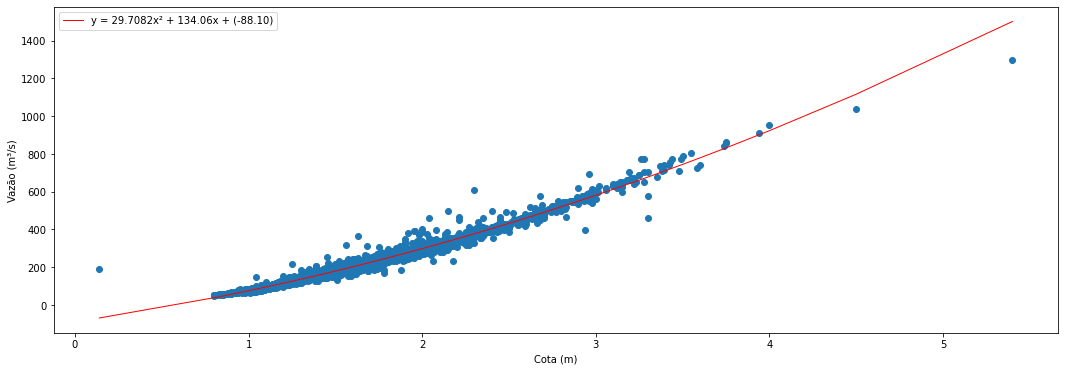

In [5]:
fig, ax = plt.subplots(figsize=(18, 6))

label='y = {:.4f}x² + {:.2f}x + ({:.2f})'.format(coefs[0], coefs[1], coefs[2])

ax.scatter(cotas, vazoes)
ax.plot(cotas, curva, color = 'red', lw=1, label = label)

ax.set_ylabel("Vazão (m³/s)")
ax.set_xlabel("Cota (m)")
ax.legend()